<a href="https://colab.research.google.com/github/lisahligono/short-demo/blob/main/Ligono_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
In this exercise I will be predicting the quality of wine using machine learning and deep learning algorithms. At the end we will see which algorithm had the highest accuracy. To begin the exercise all libraries needed for this exercise are first imported.

Author: Lisah Khadiala Ligono

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
%matplotlib inline

The datasets for the wine are imported from the University of California Irvine Machine Learning repository. They are imported separately as '*red*' and '*white*' and later on combined into a new dataframe '*wine*'. A new column '***type***' is added to distinguish between the red and the white wine.

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red = pd.read_csv(url, sep=';')
red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white = pd.read_csv(url, sep=';')
white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red['type'] = 0
white['type'] = 1
wine = pd.concat([red, white], axis=0)
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
wine.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


# **Exploratory Data Analysis and Feature Engineering**
Exploratory Data Analysis (EDA) is conducted to answer the following questions:


1.   What is the total number of rows in the dataset?
2.   Are there any missing or null values?
3.   What is the count of the duplicated rows?
4.   What is the correlation between all the variables?
5.   How does each variable behave (statistically) with the quality variable
6.   Does the type of wine (red or white) influence the quality rating?








In [ ]:
# Number of rows in the dataset
wine.shape[0]

6497

In [ ]:
wine.info()
wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [ ]:
# The number of duplicate rows in the dataset
sum(wine.duplicated())

1177

In [ ]:
# Dropping the duplicate rows in the dataset
#wine.drop_duplicates(inplace=True)

In [ ]:
# descriptive statistics across all variables
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


I explore and visualize the correlation between the vatiables. I am able to get a much better understanding of the relationships between the variables in a quick glimpse.

<AxesSubplot:>

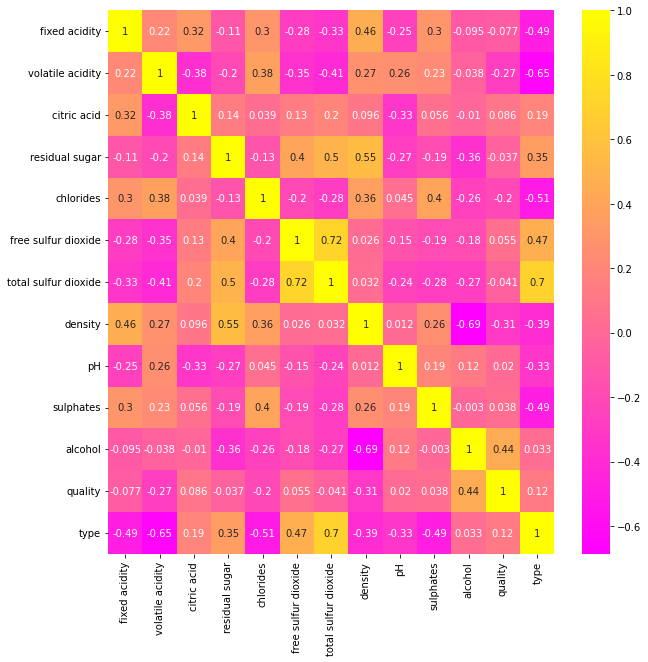

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),cmap = 'spring', annot=True) # vertical orientation
#sns.heatmap(wine.corr(),cmap = 'spring', annot=True, cbar_kws= {'orientation': 'horizontal'})

<AxesSubplot:>

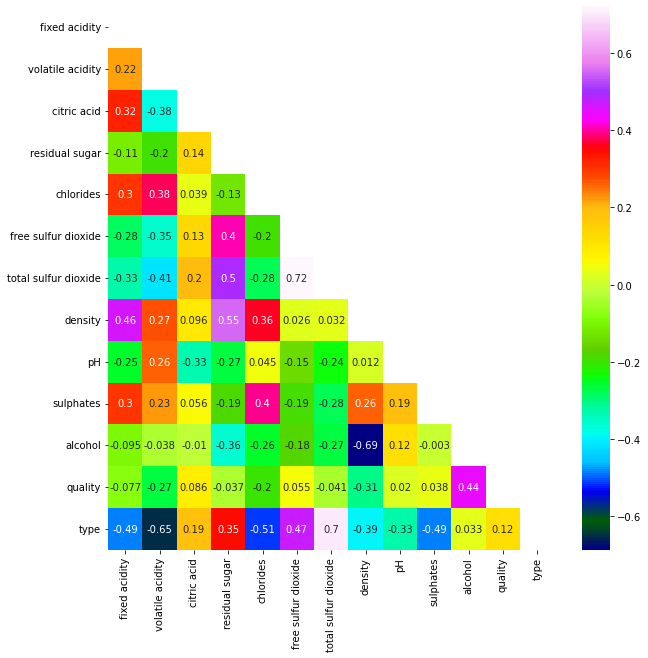

In [ ]:
plt.figure(figsize=(10,10))
matrix = np.triu(wine.corr())
sns.heatmap(wine.corr(), annot=True, mask=matrix, cmap = 'gist_ncar')

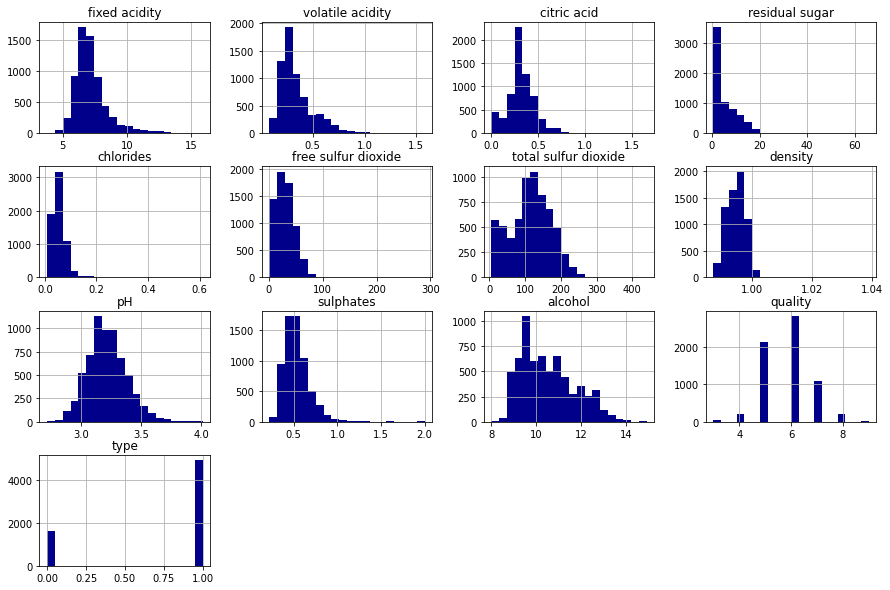

In [ ]:
# Analyzing the distribution of each variable in a histogram
wine.hist(bins=20, figsize=(15,10), color='darkblue')
plt.show()

In [ ]:
#wine['quality'].nunique()
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [ ]:
# Analyzing the distribution of samples for each quality level
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

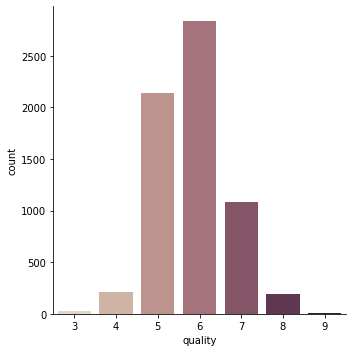

In [ ]:
sns.catplot(x="quality", kind="count", palette="ch:.25", data=wine);

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

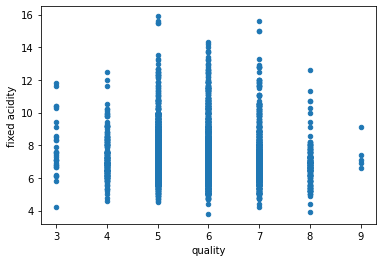

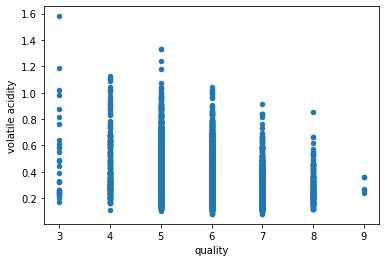

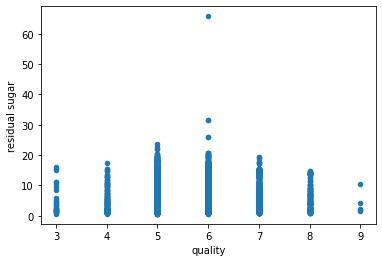

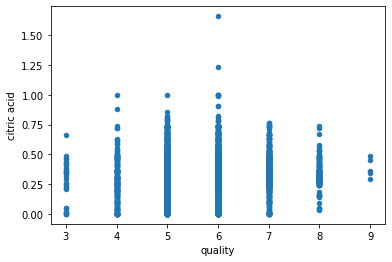

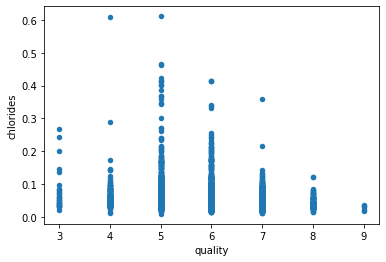

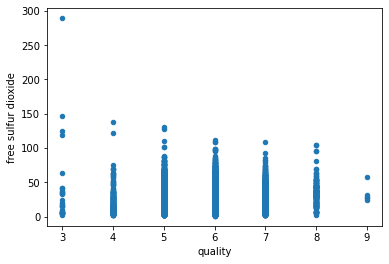

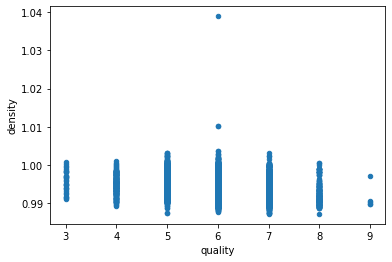

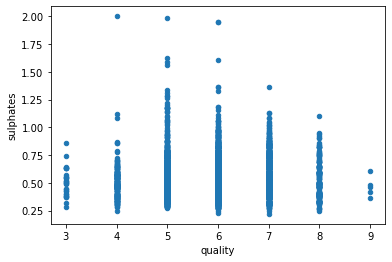

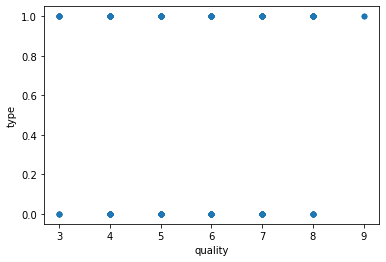

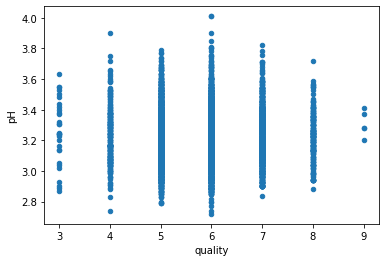

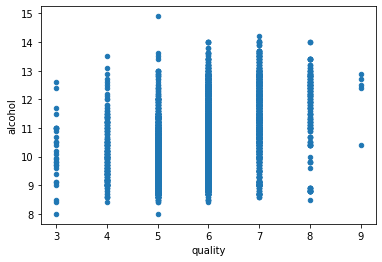

In [ ]:
# Quality versus all features
wine.plot(x='quality', y='fixed acidity', kind='scatter')
wine.plot(x='quality', y='volatile acidity', kind='scatter')
wine.plot(x='quality', y='residual sugar', kind='scatter')
wine.plot(x='quality', y='citric acid', kind='scatter')
wine.plot(x='quality', y='chlorides', kind='scatter')
wine.plot(x='quality', y='free sulfur dioxide', kind='scatter')
wine.plot(x='quality', y='density', kind='scatter')
wine.plot(x='quality', y='sulphates', kind='scatter')
wine.plot(x='quality', y='type', kind='scatter')
wine.plot(x='quality', y='pH', kind='scatter')
wine.plot(x='quality', y='alcohol', kind='scatter')

In [ ]:
# Mean of each variable for each quality rating
wine.mean()
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
quality,,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000,0.666667
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093,0.754630
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783,0.681478
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553,0.775035
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006,0.815570
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756,0.906736
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000,1.000000


In [ ]:
# Based on the color (0 = red; 1 = white)
wine.groupby(['quality','type']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality type                                                                 
3       0          8.360000          0.884500     0.171000        2.635000   
        1          7.600000          0.333250     0.336000        6.392500   
4       0          7.779245          0.693962     0.174151        2.694340   
        1          7.129448          0.381227     0.304233        4.628221   
5       0          8.167254          0.577041     0.243686        2.528855   
        1          6.933974          0.302011     0.337653        7.334969   
6       0          8.347179          0.497484     0.273824        2.477194   
        1          6.837671          0.260564     0.338025        6.441606   
7       0          8.872362          0.403920     0.375176        2.720603   
        1          6.734716          0.262767     0.325625        5.186477   
8       0          8.566667          0.423333     0.391111        2.577778   
        1          6.657143          0.277400     0.326514        5.671429   
9       1          7.420000          0.298000     0.386000        4.120000   

              chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality type                                                                   
3       0      0.122500            11.000000             24.900000  0.997464   
        1      0.054300            53.325000            170.600000  0.994884   
4       0      0.090679            12.264151             36.245283  0.996542   
        1      0.050098            23.358896            125.279141  0.994277   
5       0      0.092736            16.983847             56.513950  0.997104   
        1      0.051546            36.432052            150.904598  0.995263   
6       0      0.084956            15.711599             40.869906  0.996615   
        1      0.045217            35.650591            137.047316  0.993961   
7       0      0.076588            14.045226             35.020101  0.996104   
        1      0.038191            34.125568            125.114773  0.992452   
8       0      0.068444            13.277778             33.444444  0.995212   
        1      0.038314            36.720000            126.165714  0.992236   
9       1      0.027400            33.400000            116.000000  0.991460   

                    pH  sulphates    alcohol  
quality type                                  
3       0     3.398000   0.570000   9.955000  
        1     3.187500   0.474500  10.345000  
4       0     3.381509   0.596415  10.265094  
        1     3.182883   0.476135  10.152454  
5       0     3.304949   0.620969   9.899706  
        1     3.168833   0.482203   9.808840  
6       0     3.318072   0.675329  10.629519  
        1     3.188599   0.491106  10.575372  
7       0     3.290754   0.741256  11.465913  
        1     3.213898   0.503102  11.367936  
8       0     3.267222   0.767778  12.094444  
        1     3.218686   0.486229  11.636000  
9       1     3.308000   0.466000  12.180000

In [ ]:
# Let us see whether the type of wine is associated with quality
wine.groupby('type').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
0,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
1,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


Text(0, 0.5, 'Quality')

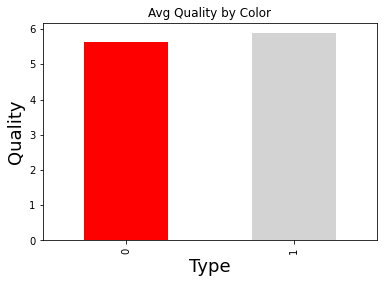

In [ ]:
type_means = wine.groupby('type')['quality'].mean()

colors=['red', 'lightgrey']
type_means.plot(kind='bar', title='Avg Quality by Color', color = colors)

plt.xlabel('Type', fontsize=18)
plt.ylabel('Quality', fontsize=18)

# **Feature Selection**
I want to predict whether the wine is of '*best*' quality or not. To avoid overfitting and reduced model performance I conduct feature selection to identify the most important features for predicting wine quality from the original set of chemical variables using the corelation matrix.

In [ ]:
wine.drop('quality', axis=1).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [ ]:
# Create Classification version of target variable
wine['best'] = [1 if x >= 7 else 0 for x in wine['quality']]
# Separate feature variables and target variable
X = wine.drop(['quality','best'], axis = 1)
y = wine['best']


In [ ]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,best
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0,0


In [ ]:
wine['best'].value_counts()

0    5220
1    1277
Name: best, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


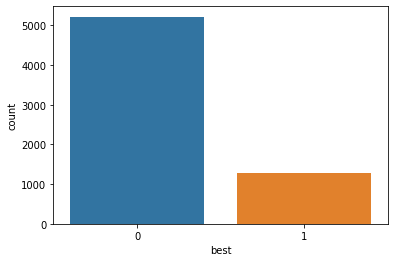

In [ ]:
sns.countplot(y)
plt.show()

In [ ]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'best'],
      dtype='object')

In [ ]:
# Manually selected features based on their correlation matrix
# Separated my feature variables (X) and the target variable (y) into separate dataframes
data = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
target = wine['best']


In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

# **Machine Learning Algorithm**
I chose the Random Forest classifier to predict wine quality because of its ability to handle high-dimensional datasets with many features, its ability to handle both numerical and categorical variables, and its ability to handle non-linear relationships between the variables and the target variable. Additionally, random forest can be less prone to overfitting than other machine learning algorithms, which can be important when working with small datasets or when dealing with noisy or complex data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=2020)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)

Accuracy =  0.8815384615384615


In [ ]:
# Overfitting
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.818377094806656


In [ ]:
# Hyperparameter tunning
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2020, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'max_depth': [1, 5, 10, 15],
'n_estimators': [100,200,300,400,500,600]}
rf_random = RandomizedSearchCV(rf_model,random_grid, n_iter = 50, cv = 5,random_state = 2020)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 200, 'max_depth': 15}


In [ ]:
rf_new = RandomForestClassifier(n_estimators = 200, max_depth =  15, random_state = 2020)
rf_new.fit(X_train,y_train)
y_pred_rf = rf_new.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)
scores = cross_val_score(rf_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Accuracy =  0.8810256410256411
Cross Validation Score:  0.8177615917569728


# **Feature importance**
From the classification we are able to see the 5 most important features for wine quality prediction. These features are:


In [ ]:
imp_rf = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),columns = ["feature", "importance"])
imp_rf.set_index("feature", inplace=True)
imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
imp_rf.head()

,importance
feature,
alcohol,0.159740
density,0.112244
chlorides,0.087747
volatile acidity,0.084203
total sulfur dioxide,0.083459


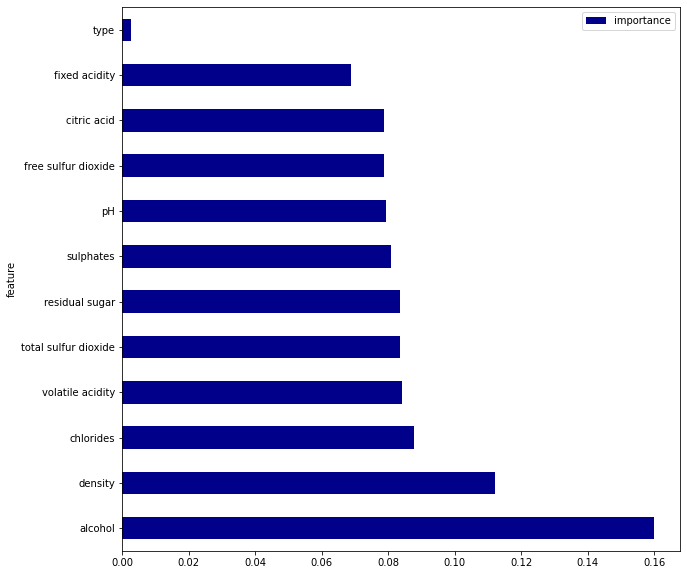

In [ ]:
imp_rf.plot.barh(figsize=(10,10), color = 'darkblue')
plt.show()

<AxesSubplot:xlabel='best', ylabel='alcohol'>

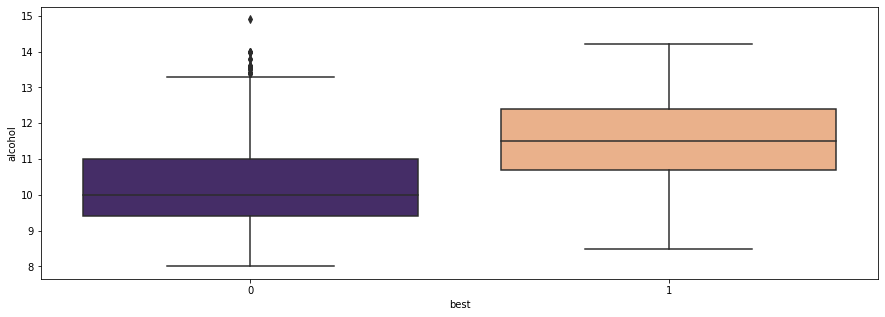

In [ ]:
# Since alcohol is the most important feature I visualize the alcohol percentage for the best quality of wine
plt.figure(figsize=(15,5))
sns.boxplot(x="best", y="alcohol", palette=['#432371',"#FAAE7B"] ,data=wine)

# **Accuracy Assessment**
To evaluate the performance of the algorithm accuracy assessment is conducted. The following metrics are also calculated:


1.  Precision
2.  Recall
3.  F1 score






In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test, y_pred_rf)
cm

array([[1503,   64],
       [ 168,  215]])

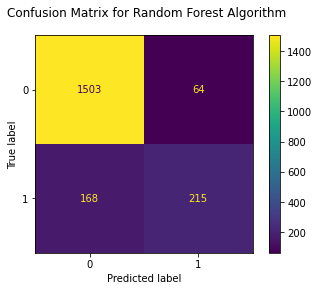

In [ ]:
fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
fig.figure_.suptitle("Confusion Matrix for Random Forest Algorithm")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1567
           1       0.77      0.56      0.65       383

    accuracy                           0.88      1950
   macro avg       0.84      0.76      0.79      1950
weighted avg       0.87      0.88      0.87      1950



# **Deep Learning Algorithm**
I conducted this using the multi-layer perceptron (MLP) deep learning algorithm. MLP is a type of neural network that consists of multiple layers of interconnected nodes, each of which performs a nonlinear transformation on the input data. The model is then evaluated using accuracy, precision, recall, and F1 score performance metrics.

In [ ]:

mlp_nn = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_nn.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [ ]:
y_pred = mlp_nn.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.81


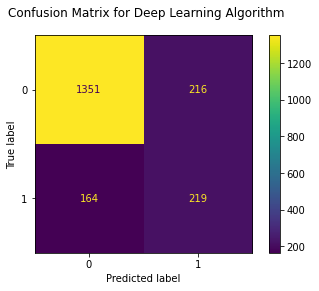

In [ ]:
fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
fig.figure_.suptitle("Confusion Matrix for Deep Learning Algorithm")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1567
           1       0.50      0.57      0.54       383

    accuracy                           0.81      1950
   macro avg       0.70      0.72      0.71      1950
weighted avg       0.82      0.81      0.81      1950



# Results and Conclusion

The RF classifier produced an accuracy of **0.88** while the MLP classifier produced an accuracy of **0.81**.

*Why the does the simple clasifier have a higher accuracy than the complex classifier?* I have tried to explain the possible reasons for this in the attached pdf document.